## FinalProject_MLModel_2ndSegment

This project is about predicting housing prices across various regions/Zipcodes in the country based on various market factors such as gas prices, unemployment rate, mortgage rates, interest rates, and inflation rates. We will be utilizing supervised machine learning models for this purpose.

In [90]:
# Import denpendencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn import linear_model 
import statsmodels.api as sm
import seaborn as sns
import math

In [91]:
# Upload the CSV files 
file_load = "Resources/full_data_set_zipcodes.csv"
df = pd.read_csv(file_load)
df.head()

,DATE,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,AVG_MORTGAGE_RATE,INTEREST_RATES,INFLATION,10001,60601,89101,75201,...,19468,32550,96738,76262,85641,34228,18938,95223,19047,60081
0,2011-01-01,3.148,9.1,4.8,0.17,220.223,462700.0,188500.0,115600.0,191900.0,...,229700.0,284400.0,237800.0,128400.0,204100.0,432300.0,528100.0,266300.0,272300.0,203600.0
1,2011-02-01,3.264,9.0,4.9,0.16,221.309,466200.0,189400.0,114000.0,184500.0,...,216700.0,258100.0,216000.0,148400.0,194000.0,476900.0,482600.0,244200.0,291500.0,175600.0
2,2011-03-01,3.615,9.0,5.0,0.14,223.467,465600.0,186300.0,110800.0,174500.0,...,199800.0,253800.0,208800.0,150500.0,192400.0,440900.0,454800.0,217800.0,305600.0,170200.0
3,2011-04-01,3.852,9.1,4.9,0.10,224.906,469500.0,177700.0,109600.0,152000.0,...,211500.0,225700.0,229800.0,161600.0,185900.0,457500.0,463300.0,191200.0,342300.0,184800.0
4,2011-05-01,3.960,9.0,4.9,0.09,225.964,471300.0,167900.0,108200.0,162900.0,...,215300.0,230800.0,260100.0,131500.0,175900.0,470600.0,475400.0,201500.0,342600.0,198900.0


### Preliminary Data Preprocessing
Data utilized for this project was obtained from six different sources. All sources are listed and linked in the project README.md file on the github repository.
Data preprocessing was conducted in a separate jupyter notebook: [Preprocessing Notebook.ipynb](https://github.com/pbthompson92/Final_Project_Outliers/blob/main/preprocessing_4a_adding_additional_datasets_by_zipcodes.ipynb)

As is clear from the notebook referenced above, we have created our final dataset by combining Housing prices across the country with gas prices dataset, unemployment rates dataset, mortgage rates dataset, federal interest rates dataset, and CPI inex dataset which depicts inflation in the country.

We followed the following steps to accomplish data pre-processing:
- Import the libraries
- Import the Dataset
- Check the missing values
- Splitting the dataset into trainig and testing set
- Feature scaling: is a method used to normalize the range of independent variables or features of data. So when the values vary a lot in an independent variable, we use feature scaling so that all the values remain in the comparable range. The variations in our dataset can be minimized simply by dividing the house prices by 1000.


In [92]:
# Check the data types of each column 
df.dtypes

DATE                  object
PRICE_PER_GALLON     float64
UNEMPLOYMENT_RATE    float64
AVG_MORTGAGE_RATE    float64
INTEREST_RATES       float64
                      ...   
34228                float64
18938                float64
95223                float64
19047                float64
60081                float64
Length: 944, dtype: object

In [93]:
# Check number of columns in the dataframe
len(df.columns)

944

In [94]:
# Dropping DATE column 
df.drop(columns="DATE", axis=1, inplace=True)
df.head()

,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,AVG_MORTGAGE_RATE,INTEREST_RATES,INFLATION,10001,60601,89101,75201,43085,...,19468,32550,96738,76262,85641,34228,18938,95223,19047,60081
0,3.148,9.1,4.8,0.17,220.223,462700.0,188500.0,115600.0,191900.0,89100.0,...,229700.0,284400.0,237800.0,128400.0,204100.0,432300.0,528100.0,266300.0,272300.0,203600.0
1,3.264,9.0,4.9,0.16,221.309,466200.0,189400.0,114000.0,184500.0,86000.0,...,216700.0,258100.0,216000.0,148400.0,194000.0,476900.0,482600.0,244200.0,291500.0,175600.0
2,3.615,9.0,5.0,0.14,223.467,465600.0,186300.0,110800.0,174500.0,79800.0,...,199800.0,253800.0,208800.0,150500.0,192400.0,440900.0,454800.0,217800.0,305600.0,170200.0
3,3.852,9.1,4.9,0.10,224.906,469500.0,177700.0,109600.0,152000.0,79300.0,...,211500.0,225700.0,229800.0,161600.0,185900.0,457500.0,463300.0,191200.0,342300.0,184800.0
4,3.960,9.0,4.9,0.09,225.964,471300.0,167900.0,108200.0,162900.0,78600.0,...,215300.0,230800.0,260100.0,131500.0,175900.0,470600.0,475400.0,201500.0,342600.0,198900.0


There are a total of 943 columns, out of which 6 are independent variables and remaining 937 are the housing prices in various regions in the country denoted by their Zip codes. The housing prices in each zip code is our dependent variable.

### Detecting Outliers

<AxesSubplot:xlabel='PRICE_PER_GALLON'>

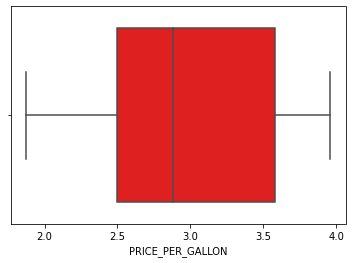

In [95]:
sns.boxplot(df['PRICE_PER_GALLON'],color='red')

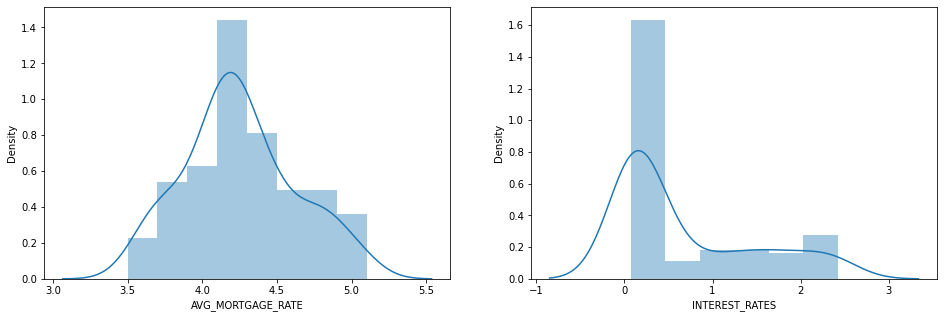

In [96]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(df['PRICE_PER_GALLON'])
# plt.subplot(1,2,2)
# sns.distplot(df['UNEMPLOYMENT_RATE'])
plt.subplot(1,2,1)
sns.distplot(df['AVG_MORTGAGE_RATE'])
plt.subplot(1,2,2)
sns.distplot(df['INTEREST_RATES'])
plt.show()

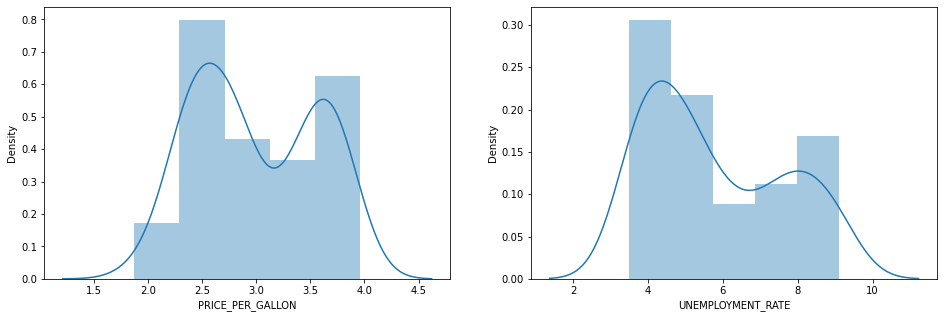

In [97]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['PRICE_PER_GALLON'])
plt.subplot(1,2,2)
sns.distplot(df['UNEMPLOYMENT_RATE'])
plt.show()

In [98]:
# Finding the boundary values

# Gas Price
print("Highest allowed",df['PRICE_PER_GALLON'].mean() + 3*df['PRICE_PER_GALLON'].std())
print("Lowest allowed",df['PRICE_PER_GALLON'].mean() - 3*df['PRICE_PER_GALLON'].std())
print("------------------------------------------")

# Unemployment rate
print("Highest allowed",df['UNEMPLOYMENT_RATE'].mean() + 3*df['UNEMPLOYMENT_RATE'].std())
print("Lowest allowed",df['UNEMPLOYMENT_RATE'].mean() - 3*df['UNEMPLOYMENT_RATE'].std())
print("------------------------------------------")

# Mortgage rate
print("Highest allowed",df['AVG_MORTGAGE_RATE'].mean() + 3*df['AVG_MORTGAGE_RATE'].std())
print("Lowest allowed",df['AVG_MORTGAGE_RATE'].mean() - 3*df['AVG_MORTGAGE_RATE'].std())
print("------------------------------------------")

# Interest Rate
print("Highest allowed",df['INTEREST_RATES'].mean() + 3*df['INTEREST_RATES'].std())
print("Lowest allowed",df['INTEREST_RATES'].mean() - 3*df['INTEREST_RATES'].std())
print("------------------------------------------")

# Inflation
print("Highest allowed",df['INFLATION'].mean() + 3*df['INFLATION'].std())
print("Lowest allowed",df['INFLATION'].mean() - 3*df['INFLATION'].std())

Highest allowed 4.6886833106263675
Lowest allowed 1.3015329055898466
------------------------------------------
Highest allowed 11.252956823043755
Lowest allowed 0.3254215553346178
------------------------------------------
Highest allowed 5.365542363895246
Lowest allowed 3.1353585370056547
------------------------------------------
Highest allowed 3.03658589979017
Lowest allowed -1.6803696835739537
------------------------------------------
Highest allowed 269.52033536758364
Lowest allowed 209.98193490268682


In [99]:
# Finding the Outliers 
outlier_gas = df[(df["PRICE_PER_GALLON"] > 4.69) | (df['PRICE_PER_GALLON'] < 1.30)]
outlier_unemployment = df[(df["UNEMPLOYMENT_RATE"] > 11.26) | (df['UNEMPLOYMENT_RATE'] < 0.33)]
outlier_mortgage = df[(df["AVG_MORTGAGE_RATE"] > 5.37) | (df['AVG_MORTGAGE_RATE'] < 3.14)]
outlier_interest = df[(df["INTEREST_RATES"] > 3.04) | (df['INTEREST_RATES'] < -1.68)]
outlier_inflation = df[(df["INFLATION"] > 269.52) | (df['INFLATION'] < 209.98)]

In [100]:
# Capping an outliers 



### Multiple Linear Regression Model
Our problem statement involves predicting housing values. This problem can be solved by using a regression model. Multiple Linear Regression (MLR) is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variables.
Multiple regressions are based on the assumption that there is a linear relationship between both the dependent and independent variables. It also assumes no major correlation between the independent variables.

### Check for Linearity
In order for the MLR model to be applicable we want to check that a linear relationship exists between the dependent variable and the independent variables. This can be checked by using scatter plots.

In [101]:
# Enter the zipcode to build the model. Example: 10001 etc. 
# As Mentioned above, this model has 937 different zipcodes to choose from.
region = input("Enter the 5 digit Zipcode: ")

Enter the 5 digit Zipcode: 10001


Text(0.5, 1.0, 'Inflation vs Housing')

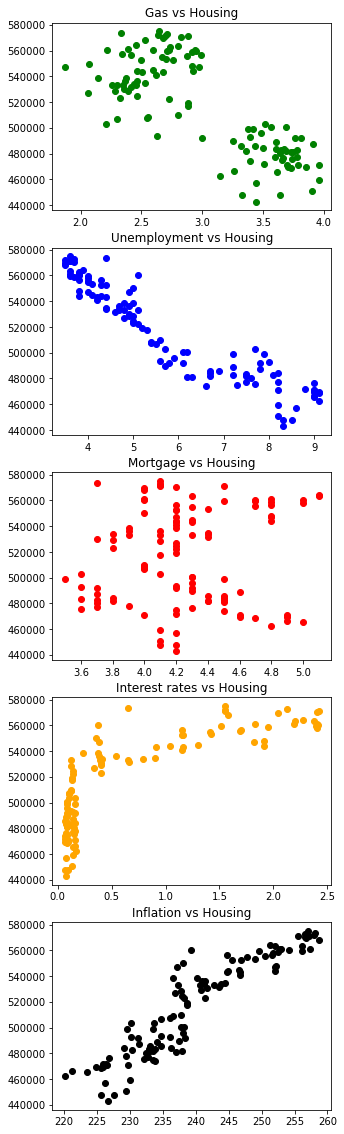

In [102]:
# Plot the code 
fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5,1,figsize = (5,20))
ax1.scatter(df["PRICE_PER_GALLON"],df[region], c="green")
ax1.set_title('Gas vs Housing')
ax2.scatter(df["UNEMPLOYMENT_RATE"], df[region], c="blue")
ax2.set_title('Unemployment vs Housing')
ax3.scatter(df["AVG_MORTGAGE_RATE"],df[region], c="red")
ax3.set_title('Mortgage vs Housing')
ax4.scatter(df["INTEREST_RATES"], df[region], c="orange")
ax4.set_title('Interest rates vs Housing')
ax5.scatter(df["INFLATION"], df[region], c="black")
ax5.set_title('Inflation vs Housing')

### Feature Engineering

Feature engineering is a process of extracting useful features from raw data using math, statistics and domain knowledge. For our project we started the process of feature engineering early on by detecting missing values and removing them from the dataset. Additionally during preprocessing, we added zipcodes as a feature to our dataset by matching each region ID against the respective zip codes.

(Maybe Outlier detection??)

### Feature Selection 
In our dataset, we have 5 input features (Gas Prices, Mortgage rates, Interest rates, Inflation and Unemployment rates) for our model. We are trying to visualize a correlation between these 5 features and the housing prices which is our target value in this machine learning model. 

Based on the above scatter plots, we can see that Interest Rates and Inflation (Consumer Price Index - CPI) have a linear relationship with Housing Prices. The Gas Prices and Unemployment Rates also have a linear relationship with Housing Prices, but with a negatice slope, whihc means that housing prices decrease with increasing as prices and unemployment rates. We can also see that Mortage rates do not have a linear relationship with Housing Prices. 
Since Mortgage Rates and Housing Prices do not have linear relationship, in order to move forward with MLR model, we decided to drop Mortage Rates feature from our dataset. 

In [103]:
# Droping Mortgage Rates
df2 = df.drop(columns="AVG_MORTGAGE_RATE", axis=1)
df2.head()

,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,INTEREST_RATES,INFLATION,10001,60601,89101,75201,43085,40202,...,19468,32550,96738,76262,85641,34228,18938,95223,19047,60081
0,3.148,9.1,0.17,220.223,462700.0,188500.0,115600.0,191900.0,89100.0,125900.0,...,229700.0,284400.0,237800.0,128400.0,204100.0,432300.0,528100.0,266300.0,272300.0,203600.0
1,3.264,9.0,0.16,221.309,466200.0,189400.0,114000.0,184500.0,86000.0,124000.0,...,216700.0,258100.0,216000.0,148400.0,194000.0,476900.0,482600.0,244200.0,291500.0,175600.0
2,3.615,9.0,0.14,223.467,465600.0,186300.0,110800.0,174500.0,79800.0,118300.0,...,199800.0,253800.0,208800.0,150500.0,192400.0,440900.0,454800.0,217800.0,305600.0,170200.0
3,3.852,9.1,0.10,224.906,469500.0,177700.0,109600.0,152000.0,79300.0,117600.0,...,211500.0,225700.0,229800.0,161600.0,185900.0,457500.0,463300.0,191200.0,342300.0,184800.0
4,3.960,9.0,0.09,225.964,471300.0,167900.0,108200.0,162900.0,78600.0,113800.0,...,215300.0,230800.0,260100.0,131500.0,175900.0,470600.0,475400.0,201500.0,342600.0,198900.0


In [104]:
# Check all maximum values for each column

max_elements = df2.max(axis=0)
print(max_elements)

PRICE_PER_GALLON          3.960
UNEMPLOYMENT_RATE         9.100
INTEREST_RATES            2.420
INFLATION               258.678
10001                575100.000
                        ...    
34228                663200.000
18938                665600.000
95223                345100.000
19047                416200.000
60081                270300.000
Length: 942, dtype: float64


In [105]:
# Create Feature and Target variable
X1 = df2.copy()
X1 = X1[["PRICE_PER_GALLON", "UNEMPLOYMENT_RATE", "INTEREST_RATES", "INFLATION"]]

y1 = (df2[region]/1000).values.reshape(-1,1)


In [106]:
# Structure of X and y
print(X1.shape)
print(y1.shape)

(111, 4)
(111, 1)


In [107]:
# Columns 
columns = df2.columns.tolist()
columns[:5]

['PRICE_PER_GALLON',
 'UNEMPLOYMENT_RATE',
 'INTEREST_RATES',
 'INFLATION',
 '10001']

### Splitting data into Training and Testing Sets
We used the Python Scikitlearn's train_test_split function to split our data into training and testing sets for model performance evaluation. This is done by importing train_test_split from sklearn.model_selection. By default this function alots 25% of the dataset as the testing set.

In [108]:
# Train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
X1_train.head()

,PRICE_PER_GALLON,UNEMPLOYMENT_RATE,INTEREST_RATES,INFLATION
15,3.958,8.2,0.14,230.085
44,3.484,5.9,0.09,238.031
89,2.970,4.0,1.82,251.989
90,2.928,3.8,1.91,252.006
9,3.506,8.8,0.07,226.421


### Performing the Multiple Linear Regression

In [109]:
# Model 
model = LinearRegression()

#Fit the model 
model.fit(X1_train, y1_train)
print(f"Intercept: {model.intercept_}")
Coeff = model.coef_
print(f"Coefficients: {Coeff}")

predictions = model.predict(X1_test)


Intercept: [-22.44082866]
Coefficients: [[-28.84850084   3.01914595   6.15355985   2.52053145]]


In [110]:
# Model Evaluation with RMSE, R2 and adjusted R2
MAE = round(mean_absolute_error(y1_test, predictions), 2)
print("Mean Absolute Error (MAE):  ", MAE)

MSE = round(mean_squared_error(y1_test,predictions), 2)
print("Mean Squared Error (MSE):  ", MSE)

RMSE = round(np.sqrt(mean_squared_error(y1_test,predictions)), 2)
print("Root Mean Squared Error (RMSE): ", RMSE)

RMSLE = round(np.log(np.sqrt(mean_squared_error(y1_test,predictions))), 2)
print("Root Mean Squared Log Error (RMSLE):", RMSLE)

R2 = round(model.score(X1_test, y1_test), 2)
print("R Squared (R2): ", R2)

adj_R2 = round(1 - (1-model.score(X1_test, y1_test))*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1), 2)
print("adjusted R Squared (adj R2):  ", adj_R2)

Mean Absolute Error (MAE):   10.42
Mean Squared Error (MSE):   169.21
Root Mean Squared Error (RMSE):  13.01
Root Mean Squared Log Error (RMSLE): 2.57
R Squared (R2):  0.88
adjusted R Squared (adj R2):   0.86


In [111]:
# To predict data 
# prediction with sklearn

NEW_PRICE_PER_GALLON = 6.69
NEW_UNEMPLOYMENT_RATE = 13.5
NEW_INTEREST_RATES = 4.5
NEW_INFLATION = 356
Predicted_HP = (1000*model.predict([[NEW_PRICE_PER_GALLON, NEW_UNEMPLOYMENT_RATE, 
                                           NEW_INTEREST_RATES, NEW_INFLATION ]]))
print('Predicted Housing Price: \n $', round(Predicted_HP[0][0], 2))

Predicted Housing Price: 
 $ 750321.39


In [112]:
# Create DataFrame with required values for each region
# assign data of lists.  
data = {'INTERCEPT': model.intercept_, 'Coefficient_1': Coeff[0][0], 'Coefficient_2': Coeff[0][1], 
        'Coefficient_3': Coeff[0][2], 'Coefficient_4': Coeff[0][3], 'MSE':[MSE], 'RMSE':[RMSE], 
        'R2': [R2], 'ADJ R2': [adj_R2]}  
  
# Creates pandas DataFrame.  
model_output_df = pd.DataFrame(data, index =[region])  
  
# Check output dataframe  
model_output_df  

,INTERCEPT,Coefficient_1,Coefficient_2,Coefficient_3,Coefficient_4,MSE,RMSE,R2,ADJ R2
10001,-22.440829,-28.848501,3.019146,6.15356,2.520531,169.21,13.01,0.88,0.86


### We will use statsmodel to generate comprehensive table with statistical info about our model

In [113]:
# Statistical info with statsmodels
X1_train = sm.add_constant(X1_train) # adding a constant
 
model_2 = sm.OLS(y1_train, X1_train).fit()
  
print_model = model_2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     379.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.83e-50
Time:                        15:19:42   Log-Likelihood:                -291.90
No. Observations:                  83   AIC:                             593.8
Df Residuals:                      78   BIC:                             605.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -22.4408    105.07

Notice that the coefficients captured in this table match with the coefficients generated by sklearn.

In [114]:
# The Adjusted-r-squared of the multiple linear regression model 
model_2.rsquared_adj

0.9486301489454708

## Graphical User Interface (GUI) 
Now creating a GUI that will allow users to input the independent variables in order to get the predicted result.
Tkinter is the standard GUI library for Python. Python when combined with Tkinter provides a fast and easy way to create GUI applications. Tkinter provides a powerful object-oriented interface to the Tk GUI toolkit.

In [63]:
#from tkinter import ttk
# tkinter GUI
root= tk.Tk()

# The Canvas widget is used to draw shapes (such as a rectangle) in our application
canvas1 = tk.Canvas(root, width = 500, height = 300)
# The pack() method organizes widgets in blocks before placing them in the parent widget.
canvas1.pack()

# Adding Intercept label to the GUI (with sklearn)
Intercept_result = ('Intercept: ', model.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# Adding Coefficient label to the GUI (with sklearn)
Coefficients_result  = ('Coefficients: ', model.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)


# Creating label for a new gas price and asking for user input as an entry in box 1
label1 = tk.Label(root, text='Type Gas Price: ')
canvas1.create_window(100, 60, window=label1)

entry1 = tk.Entry(root) # create 1st entry box
canvas1.create_window(300, 60, window=entry1)

# Creating label for a new unemployment rate and asking for user input as an entry in box 2
label2 = tk.Label(root, text='Type Unemployment Rate: ')
canvas1.create_window(100, 80, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(300, 80, window=entry2)

# # Creating label for a new interest rate and asking for user input as an entry in box 3
label3 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label3)

entry3 = tk.Entry(root) # create 3rd entry box
canvas1.create_window(300, 100, window=entry3)

# # Creating label for a new CPI and asking for user input as an entry in box 4
label4 = tk.Label(root, text='Type Inflation: ')
canvas1.create_window(100, 120, window=label4)

entry4 = tk.Entry(root) # create 4th entry box
canvas1.create_window(300, 120, window=entry4)

# Creating a function to be used as a command with button widget
def values(): 
    global New_Gas_Price #our 1st input variable
    New_Gas_Price = (entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = (entry2.get()) 
    
    global New_Interest_Rate #our 3rd input variable
    New_Interest_Rate = (entry3.get()) 
    
    global New_Inflation #our 4th input variable
    New_Inflation = (entry4.get()) 
    
    Prediction_result  = ('Housing Price: ', 1000*(model.predict([[New_Gas_Price,New_Unemployment_Rate, 
                                                             New_Interest_Rate, New_Inflation]])))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)

# button to call the 'values' command above 
button1 = tk.Button (root, text='Predict Housing Price', command=values, bg='blue') 
canvas1.create_window(300, 150, window=button1)

# The following code will embed individual plots of each feature vs target variable (pack within the parent widget)
#plot 1st scatter 
figure1 = plt.Figure(figsize=(5,4), dpi=100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df['PRICE_PER_GALLON'].astype(float),df[region].astype(float), color = 'r')
scatter1 = FigureCanvasTkAgg(figure1, root) 
scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax1.legend(["Region"]) 
ax1.set_xlabel('Gas Price')
ax1.set_title('Gas Price Vs. Housing Price')

#plot 2nd scatter 
figure2 = plt.Figure(figsize=(5,4), dpi=100)
ax2 = figure2.add_subplot(111)
ax2.scatter(df['UNEMPLOYMENT_RATE'].astype(float),df[region].astype(float), color = 'g')
scatter2 = FigureCanvasTkAgg(figure2, root) 
scatter2.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax2.legend(["Region"]) 
ax2.set_xlabel('Unemployment Rate')
ax2.set_title('Unemployment Rate Vs. Housing Price')

#plot 3rd scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['INTEREST_RATES'].astype(float),df[region].astype(float), color = 'b')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Region']) 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Housing Price')

#plot 4th scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['INFLATION'].astype(float),df[region].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(["Region"]) 
ax4.set_xlabel('Inflation')
ax4.set_title('Inflation (CPI) Vs. Housing Price')

root.mainloop()

Once you run the code, you’ll see this GUI, which includes the output generated by sklearn and the scatter diagrams for the selected Zipcode.

## Random Forest Regressor Model
The second model we are applying to our dataset is Random Forest(RF) Regression. This is a process that operates among multiple decision trees to get the optimum result by choosing the majority among them as the best value.

#### Advantages of Using RF
Since it works on multiple decision trees there is a chance of less over-fitting.<br/>
Greater Accuracy: Since it runs on a larger data set, the accuracy is higher.<br/>
Estimate Missing data: Since it runs on a larger data set, you can estimate the missing values as well.

In [115]:
# importing dependencies for Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [116]:
# Define the features and the target from the original dataframe
X2 = df.copy()
X2 = X2[["PRICE_PER_GALLON", "UNEMPLOYMENT_RATE", "AVG_MORTGAGE_RATE", "INTEREST_RATES", "INFLATION"]]

y2 = (df[region]/1000).values

In [117]:
print(X2.shape)
print(y2.shape)

(111, 5)
(111,)


To train the tree, we will use the Random Forest class and call it with the fit method. We will have a random forest with 1000 decision trees.

In [118]:
# Split the data into training and testing set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [119]:
# Create Random Forest Regression Model 
modelRF = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Fit the model 
modelRF.fit(X2_train, y2_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

Now using the model to predict the housing price:

In [120]:
# Prediction
prediction2 = modelRF.predict(X2_test)

To check the difference between actual and predicted housing prices:

In [121]:
# Check the difference between actual and predicted values
modelRF_df =pd.DataFrame({'Actual':y2_test, 'Predicted':prediction2})
modelRF_df.head()

,Actual,Predicted
0,556.5,541.4318
1,457.0,468.8386
2,471.3,462.5822
3,555.0,552.3795
4,538.8,534.5556


Evaluation Error for Random Forest Regression Model

In [122]:
# Evaluate MAE, MSE, RMSE error for the model 
from sklearn import metrics
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y2_test, prediction2),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y2_test, prediction2),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y2_test, prediction2)),2))

Mean Absolute Error (MAE): 8.8
Mean Squared Error (MSE): 110.79
Root Mean Squared Error (RMSE): 10.53


Checking the accuracy of our prediction

In [123]:
# Calculate the absolute errors
errors = abs(prediction2 - y2_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y2_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 8.8 degrees.
Accuracy: 98.22 %.


#### Plotting the difference between the actual and the predicted value.

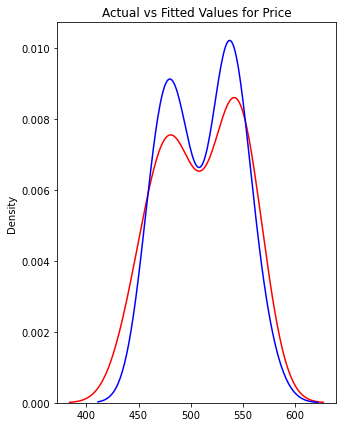

In [124]:
# Plot to visualize the difference between actual and predicted value 
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(y2_test, hist=False, color="r", label="Actual Value")
sns.distplot(prediction2, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

In [125]:
# To predict data 
# prediction with sklearn

NEW_PRICE_PER_GALLON = 6.69
NEW_UNEMPLOYMENT_RATE = 13.5
NEW_MORTGAGE_RATE = 5.4
NEW_INTEREST_RATES = 4.5
NEW_INFLATION = 356
Predicted_HP2 = (1000*modelRF.predict([[NEW_PRICE_PER_GALLON, NEW_UNEMPLOYMENT_RATE, NEW_MORTGAGE_RATE,  
                                           NEW_INTEREST_RATES, NEW_INFLATION]]))
print('Predicted Housing Price: \n $', round(float(Predicted_HP2),2))

Predicted Housing Price: 
 $ 471273.0


### Compare the prediction values from both Multiple Linear Regression and Random Forest Model 

In [126]:
# Change the previous Multiple Linear Regression model prediction into 1-D array
predictions = list(np.ravel(predictions))

In [127]:
# Collect all the predictions values in DataFrame
pred_df = pd.DataFrame({"LinearRegression": predictions, "RF_Regression": prediction2})
pred_df.head()

,LinearRegression,RF_Regression
0,544.968623,541.4318
1,474.910552,468.8386
2,460.594610,462.5822
3,546.014497,552.3795
4,531.432843,534.5556


### Disadvanatge of Random Forest Regression over Multiple Linear Regression
Above comparison shows that the predicted values from the two models are comparable.
Random Forest Regression is quite a robust algorithm, however, the question is should you use it for regression?

Why not use linear regression instead?  The function in a Linear Regression can easily be written as y=mx + c while a function in a complex Random Forest Regression seems like a black box that can’t easily be represented as a function. 

Generally, Random Forests produce better results, work well on large datasets, and are able to work with missing data by creating estimates for them. 

However, they pose a major challenge that is that they can’t extrapolate outside unseen data. Random Forest cannot extrapolate and the predicted values are never outside the training set values for the target variable.

This is clear from the fact that when we try to predict housing price for zipcode 10001 using new inputs, the MLR model predicts a housing price of \\$ 596,503 which is greater than the maximum of dataset (\\$575,100) whereas the RF model predicts a housing price of \\$ 471,273 which is significantly less than the dataset maximum.

## Deep Learning Model 
For our third maching learning model, we are using Neural Network deep learning.

#### Feature Selection

In our dataset, we have 5 input features (Gas Prices, Mortgage rates, Interest rates, Inflation and Unemployment rates) for our model. We are trying to build the neural network model that has ability to recognize patterns then, based on data observed in the past, predict future outcomes.

In [ ]:
# Define the features and the target from the original dataframe
X3 = df.copy()
X3 = X3[["PRICE_PER_GALLON", "UNEMPLOYMENT_RATE", "AVG_MORTGAGE_RATE", "INTEREST_RATES", "INFLATION"]]

y3 = (df[region]).values.reshape(-1,1)

### Splitting data into Training and Testing Sets
For training and testing purposes for our model, we used Python Scikitlearn's train_test_split function. We should have our data broken down into two datasets for each X (input features) and y (target variable). 

In [ ]:
# Split the data into training and testing set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

### Scaling the data
Neural networks generally perform better when the real-valued input and output variables are to be 
scaled. For this, standardizing each of the input variables and the target variable is desirable.

We use the StandardScaler from the scikit-learn library and scale all of the data together before 
splitting into train and test sets.

In [ ]:
# Standardize the data
scaler = StandardScaler()

# Fit the model 
X_scaled = scaler.fit(X3_train)

# Scale the model 
X_train_scaled = X_scaled.transform(X3_train)
X_test_scaled = X_scaled.transform(X3_test)

### Neural Network Model Building 

We will develop a Neural Network model for the dataset using TensorFlow.
Given that the dataset is small, we can do this by using a simple train/test split of the data and
review the loss values and accuracy score of the model learning curves. 
This will help us see if we are over-learning or under-learning; then we can adapt the configuration
accordingly.

Our Neural Network model has 5 features as input as defined by the problem. The model will have one hidden 
layer with 10 nodes and will use the rectified linear activation function (ReLU). The output layer
will have 1 node, given the one real-value to be predicted, and will use the sigmoid activation 
function.

### Regression Loss Function

In this section, we will investigate loss functions that are appropriate for regression predictive modeling problems.

We first calculate the natural logarithm of each of the predicted values, then calculate the mean squared logarithmic error. The model can be updated to use the ‘mean_squared_logarithmic_error‘ loss function and keep the same configuration for the output layer. We will also track the mean squared error as a metric when fitting the model so that we can use it as a measure of performance and plot the learning curve.

In [ ]:
# Import tensorflow dependencies
import tensorflow as tf

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10

model_nn = tf.keras.models.Sequential()

# First hidden layer
model_nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer1, input_dim = number_input_features, activation="relu"))

model_nn.add(tf.keras.layers.Dense(units= 1, activation="linear"))

# Compile the model 
model_nn.compile(loss="mean_squared_logarithmic_error", optimizer="adam", metrics=["mse"])

# Train the model 
fit_model = model_nn.fit(X_train_scaled, y3_train, epochs=1000)


In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index +=1

# Plot the loss during training 
history_df.plot(y="loss")
plt.title('Loss')

# Plot the mean squared error
history_df.plot(y="mse")
plt.title("Mean Squared Error")
plt.show()

In [ ]:
# summary of the model 
# Evaluate the model using the test data 
model_loss, model_accuracy = model_nn.evaluate(X_test_scaled, y3_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

### Summary of Neural Network ML model 

Based on the evaluation results, our deep learning model has the loss of 57.92 at 1000 epochs. We started at lower epochs at 50 but the loss value started very high (~130). It seems like our model needed more time to run in order to bring the losses down. For this project, we will stop the model at 1000 epochs. 

# Conclusion 

From the three models that we tried in this project (Multiple Linear Regression, Random Forest Regression and Neural Network model), we concluded that Multiple Linear Regression model is the best fit for our dataset. 

A summary of our findings is provided in the README.md file. 